# Heatmaps for DOP and Cramer Rao Bounds

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# We need to join the upper directory in order to access the local modules
import datetime
import os
import pickle
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

import itertools
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [3]:
plt.rcParams["font.family"] = "Linux Libertine O"
plt.rcParams["font.size"] = 20

In [4]:
with open("comnets_data/gnbPositions.json") as gnb_file:
    data = json.load(gnb_file)

gNBs = np.array([data["gnb0"], data["gnb1"], data["gnb2"], data["gnb3"]])

with open("comnets_data/uePositions.json") as ue_file:
    data = json.load(ue_file)

UEs = np.array(
    [data["ue0"], data["ue1"], data["ue2"], data["ue3"], data["ue4"], data["ue5"]]
)

## Dilution of Precision

Dilution of Precision is easiear to calculate as it depends on geometric parameters (CRLB under constant variance depends only on that too :D)
https://en.wikipedia.org/wiki/Dilution_of_precision_(navigation)

In [5]:
from util import dop

In [43]:
d = dop(UEs[1,:].reshape(-1,2), gNBs)

In [81]:
x = np.linspace(0,3.87,50,endpoint=True)
y = np.linspace(0,12.81,50,endpoint=True)

xx, yy = np.meshgrid(x,y)

ps = np.hstack((xx.flatten().reshape(-1,1),yy.flatten().reshape(-1,1)))
dp = dop(ps, gNBs)
xdop = np.sqrt(dp[:,0]).reshape(xx.shape)

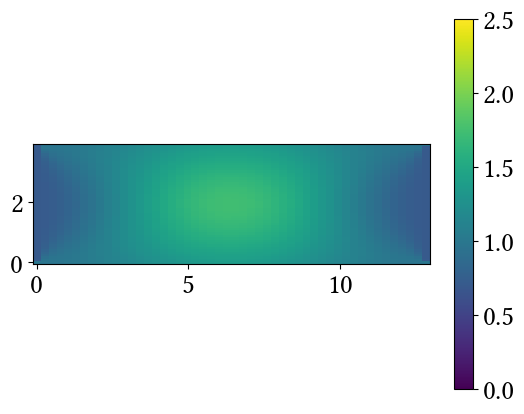

In [86]:
plt.pcolormesh(y,x,xdop.T,vmin=0.0,vmax=2.5)
plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()